<a href="https://colab.research.google.com/github/Shavkatshoniyozov/Data_Science/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
#Load data as df 

df = pd.read_excel('/content/coffee-house-satisfactory-survey.xlsx')
#df.head() #df columns look ugly, let's make them simple to read

In [106]:
#Replace column names to shorter one

columns = ['Date', 'Gender', 'Age', 'Current_status', 'Annual_income', 'Visit_frequency', 'Coffeeshop_enjoyment', 'Time_spent', 
           'Nearest_outlet', 'Membership_card', 'Frequent_purchase', 'Average_spending', 'Quality_rating', 'Price_range', 'Importance_promotions', 
           'Ambiance_rating', 'WiFi_quality', 'Service_rating', 'Business/Hangout', 'Promotion_awareness', 'Intention']
df.columns = columns
df.head()

,Date,Gender,Age,Current_status,Annual_income,Visit_frequency,Coffeeshop_enjoyment,Time_spent,Nearest_outlet,Membership_card,...,Average_spending,Quality_rating,Price_range,Importance_promotions,Ambiance_rating,WiFi_quality,Service_rating,Business/Hangout,Promotion_awareness,Intention
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [107]:
#Converting timestamp from object 

df['Date'] = pd.to_datetime(df['Date'])

In [108]:
#Extracting weekdays from timestamp

df['Date'] = df['Date'].dt.strftime('%A')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   122 non-null    object
 1   Gender                 122 non-null    object
 2   Age                    122 non-null    object
 3   Current_status         122 non-null    object
 4   Annual_income          122 non-null    object
 5   Visit_frequency        122 non-null    object
 6   Coffeeshop_enjoyment   121 non-null    object
 7   Time_spent             122 non-null    object
 8   Nearest_outlet         122 non-null    object
 9   Membership_card        122 non-null    object
 10  Frequent_purchase      122 non-null    object
 11  Average_spending       122 non-null    object
 12  Quality_rating         122 non-null    int64 
 13  Price_range            122 non-null    int64 
 14  Importance_promotions  122 non-null    int64 
 15  Ambiance_rating        

In [110]:
df['Current_status'].value_counts()

Employed         61
Student          42
Self-employed    17
Housewife         2
Name: Current_status, dtype: int64

In [111]:
df['Annual_income'].value_counts()

Less than RM25,000       71
RM25,000 - RM50,000      25
RM50,000 - RM100,000     17
More than RM150,000       6
RM100,000 - RM150,000     3
Name: Annual_income, dtype: int64

In [112]:
df['Visit_frequency'].value_counts()

Rarely     76
Monthly    26
Weekly      9
Never       9
Daily       2
Name: Visit_frequency, dtype: int64

In [113]:
#Remove Duplicates

df['Coffeeshop_enjoyment'].replace({'Never buy': 'Never', "I dont like coffee":"Never", 'never':'Never'}, inplace=True)
df['Coffeeshop_enjoyment'].value_counts()

Take away     49
Dine in       46
Drive-thru    20
Never          6
Name: Coffeeshop_enjoyment, dtype: int64

In [114]:
df['Time_spent'].value_counts()

Below 30 minutes                73
Between 30 minutes to 1 hour    34
Between 1 hour to 2 hours       12
More than 3 hours                2
Between 2 hours to 3 hours       1
Name: Time_spent, dtype: int64

In [115]:
df['Nearest_outlet'].value_counts()

more than 3km    61
1km - 3km        34
within 1km       27
Name: Nearest_outlet, dtype: int64

In [116]:
df['Membership_card'].value_counts()

No     62
Yes    60
Name: Membership_card, dtype: int64

In [117]:
dic_purchase = {'never':"Nothing", "Never buy any":'Nothing', 'Never':"Nothing", 'Cold drinks;Never':'Cold drinks'}

df['Frequent_purchase'].replace(dic_purchase, inplace=True)

In [118]:
df['Frequent_purchase'].value_counts()

Coffee                                           65
Cold drinks                                      26
Coffee;Cold drinks                                6
Coffee;Pastries                                   6
Nothing                                           4
Coffee;Sandwiches                                 3
Cold drinks;Juices;Pastries                       2
Pastries                                          2
Cold drinks;Pastries                              1
Cold drinks;Pastries;Sandwiches                   1
Coffee;Juices;Pastries;Sandwiches                 1
Coffee;Pastries;Sandwiches                        1
Coffee;Cold drinks;Pastries;Sandwiches            1
Jaws chip                                         1
cake                                              1
Coffee;Cold drinks;Juices;Pastries;Sandwiches     1
Name: Frequent_purchase, dtype: int64

In [119]:
df['Average_spending'].value_counts()

Less than RM20        58
Around RM20 - RM40    45
Zero                  12
More than RM40         7
Name: Average_spending, dtype: int64

In [120]:
df['Promotion_awareness'].value_counts()

Social Media                                                                                                                                   31
Social Media;Through friends and word of mouth                                                                                                 14
Through friends and word of mouth                                                                                                               9
Starbucks Website/Apps;Social Media                                                                                                             9
In Store displays                                                                                                                               7
Starbucks Website/Apps;Social Media;Emails;Through friends and word of mouth                                                                    6
Starbucks Website/Apps;Social Media;Through friends and word of mouth                                                       

In [122]:
dic = {'Yes':1, 'No':0}
df['Intention'] = df['Intention'].map(dic)

In [136]:
df['Membership_card'] = df['Membership_card'].map(dic)

In [138]:
df.Gender = df.Gender.replace({'Male':1, 'Female':0})

In [139]:
df.corrwith(df['Intention']).sort_values(ascending=False)

Intention                1.000000
Price_range              0.452593
Quality_rating           0.407319
Business/Hangout         0.369625
Membership_card          0.341955
Ambiance_rating          0.318145
Service_rating           0.209820
WiFi_quality             0.165734
Importance_promotions    0.112402
Gender                   0.003202
dtype: float64

In [124]:
df.describe(include=['O'])

,Date,Gender,Age,Current_status,Annual_income,Visit_frequency,Coffeeshop_enjoyment,Time_spent,Nearest_outlet,Membership_card,Frequent_purchase,Average_spending,Promotion_awareness
count,122,122,122,122,122,122,121,122,122,122,122,122,121
unique,5,2,4,4,5,5,4,5,3,2,16,4,31
top,Tuesday,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,Social Media
freq,61,65,85,61,71,76,49,73,61,62,65,58,31


In [125]:
df[["Gender", "Intention"]].groupby(['Gender'], as_index=False).mean().sort_values(by='Intention', ascending=False)

,Gender,Intention
1,Male,0.771930
0,Female,0.769231


In [126]:
df[["Current_status", "Intention"]].groupby(['Current_status'], as_index=False).mean().sort_values(by='Intention', ascending=False)

,Current_status,Intention
1,Housewife,1.000000
2,Self-employed,0.882353
0,Employed,0.803279
3,Student,0.666667


In [127]:
df[["Annual_income", "Intention"]].groupby(['Annual_income'], as_index=False).mean().sort_values(by='Intention', ascending=False)

,Annual_income,Intention
4,"RM50,000 - RM100,000",0.882353
3,"RM25,000 - RM50,000",0.800000
0,"Less than RM25,000",0.746479
1,"More than RM150,000",0.666667
2,"RM100,000 - RM150,000",0.666667


In [128]:
df[["Visit_frequency", "Intention"]].groupby(['Visit_frequency'], as_index=False).mean().sort_values(by='Intention', ascending=False)

,Visit_frequency,Intention
0,Daily,1.000000
4,Weekly,1.000000
1,Monthly,0.961538
3,Rarely,0.710526
2,Never,0.444444


In [129]:
df[["Average_spending", "Intention"]].groupby(['Average_spending'], as_index=False).mean().sort_values(by='Intention', ascending=False)

,Average_spending,Intention
2,More than RM40,1.000000
0,Around RM20 - RM40,0.933333
1,Less than RM20,0.706897
3,Zero,0.333333


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   122 non-null    object
 1   Gender                 122 non-null    object
 2   Age                    122 non-null    object
 3   Current_status         122 non-null    object
 4   Annual_income          122 non-null    object
 5   Visit_frequency        122 non-null    object
 6   Coffeeshop_enjoyment   121 non-null    object
 7   Time_spent             122 non-null    object
 8   Nearest_outlet         122 non-null    object
 9   Membership_card        122 non-null    object
 10  Frequent_purchase      122 non-null    object
 11  Average_spending       122 non-null    object
 12  Quality_rating         122 non-null    int64 
 13  Price_range            122 non-null    int64 
 14  Importance_promotions  122 non-null    int64 
 15  Ambiance_rating        

In [131]:
#Filling NaN values

df['Promotion_awareness'].fillna('Never hear', inplace=True)
df['Coffeeshop_enjoyment'].fillna('Never', inplace=True)
df.isnull().sum()

Date                     0
Gender                   0
Age                      0
Current_status           0
Annual_income            0
Visit_frequency          0
Coffeeshop_enjoyment     0
Time_spent               0
Nearest_outlet           0
Membership_card          0
Frequent_purchase        0
Average_spending         0
Quality_rating           0
Price_range              0
Importance_promotions    0
Ambiance_rating          0
WiFi_quality             0
Service_rating           0
Business/Hangout         0
Promotion_awareness      0
Intention                0
dtype: int64

# **Data Visualisation**

In [132]:
#Corralation matrix chart

df.corr().abs().style.background_gradient(cmap='Blues') 

,Quality_rating,Price_range,Importance_promotions,Ambiance_rating,WiFi_quality,Service_rating,Business/Hangout,Intention
Quality_rating,1.000000,0.532617,0.222201,0.575164,0.287830,0.451050,0.418969,0.407319
Price_range,0.532617,1.000000,0.170491,0.392726,0.289394,0.365881,0.420468,0.452593
Importance_promotions,0.222201,0.170491,1.000000,0.398178,0.327042,0.389976,0.197933,0.112402
Ambiance_rating,0.575164,0.392726,0.398178,1.000000,0.488045,0.604545,0.349267,0.318145
WiFi_quality,0.287830,0.289394,0.327042,0.488045,1.000000,0.581395,0.259387,0.165734
Service_rating,0.451050,0.365881,0.389976,0.604545,0.581395,1.000000,0.425870,0.209820
Business/Hangout,0.418969,0.420468,0.197933,0.349267,0.259387,0.425870,1.000000,0.369625
Intention,0.407319,0.452593,0.112402,0.318145,0.165734,0.209820,0.369625,1.000000


In [133]:
df.sample()

,Date,Gender,Age,Current_status,Annual_income,Visit_frequency,Coffeeshop_enjoyment,Time_spent,Nearest_outlet,Membership_card,...,Average_spending,Quality_rating,Price_range,Importance_promotions,Ambiance_rating,WiFi_quality,Service_rating,Business/Hangout,Promotion_awareness,Intention
107,Thursday,Female,Below 20,Student,"Less than RM25,000",Never,Never,Below 30 minutes,more than 3km,No,...,Zero,3,2,2,2,3,3,3,Starbucks Website/Apps;Social Media;Through fr...,1


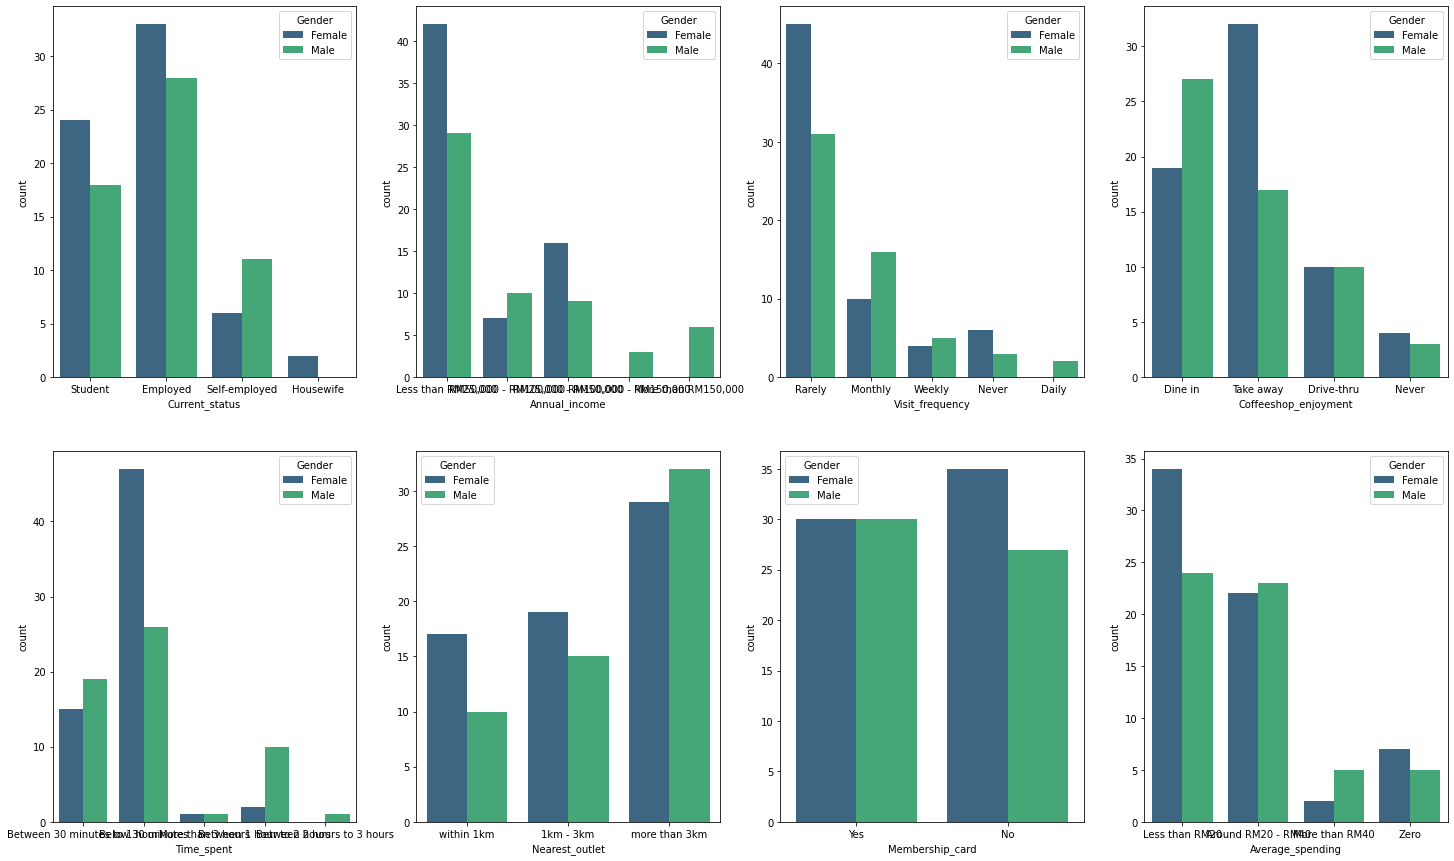

In [134]:
fig, (ax1, ax2) = plt.subplots(2,4, figsize = (25,15))

#ax1
sns.countplot(ax=ax1[0], data=df, x='Current_status', hue='Gender', palette='viridis')
sns.countplot(ax=ax1[1], data=df, x='Annual_income', hue='Gender', palette='viridis')
sns.countplot(ax=ax1[2], data=df, x='Visit_frequency', hue='Gender', palette='viridis')
sns.countplot(ax=ax1[3], data=df, x='Coffeeshop_enjoyment', hue='Gender', palette='viridis')

#ax2
sns.countplot(ax=ax2[0], data=df, x='Time_spent', hue='Gender', palette='viridis')
sns.countplot(ax=ax2[1], data=df, x='Nearest_outlet', hue='Gender', palette='viridis')
sns.countplot(ax=ax2[2], data=df, x='Membership_card', hue='Gender', palette='viridis')
sns.countplot(ax=ax2[3], data=df, x='Average_spending', hue='Gender', palette='viridis')


plt.show()

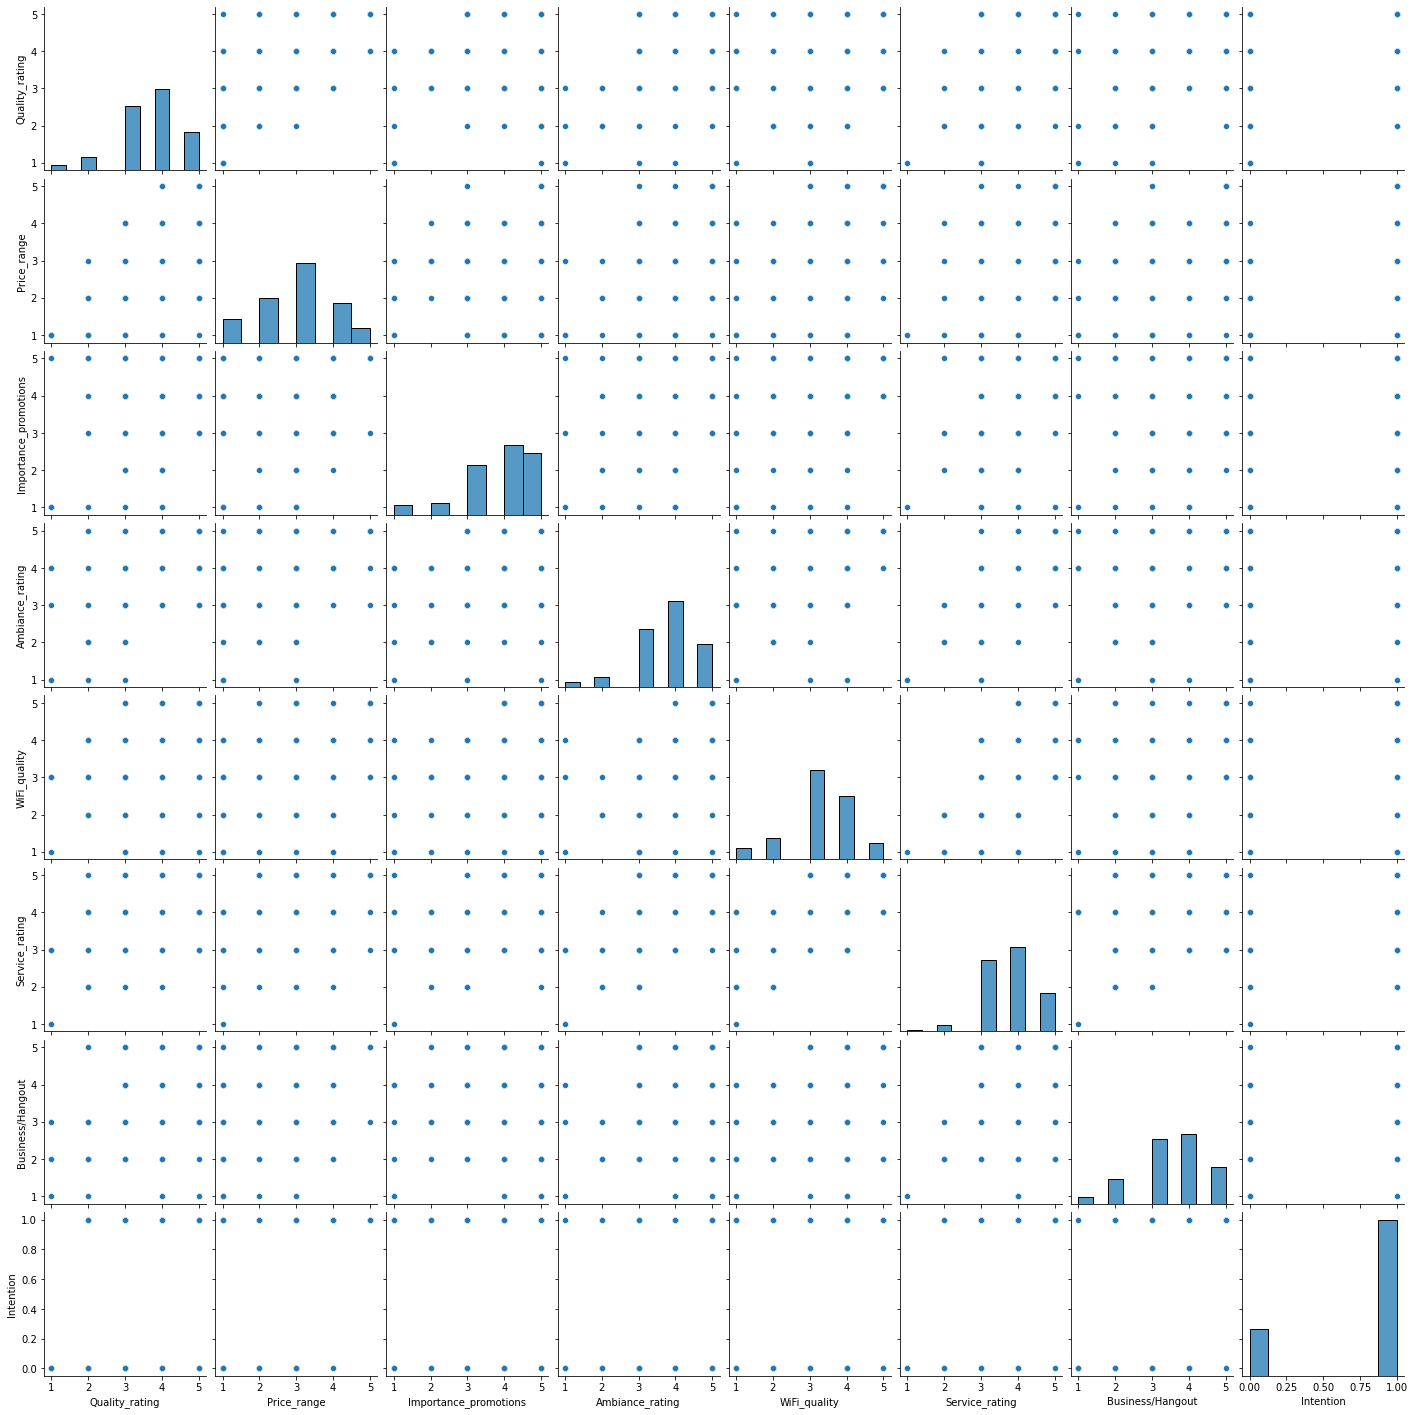

In [135]:
%matplotlib inline
sns.pairplot(df)